In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

## Loading Data

In [2]:
train_data = pd.read_csv('train_PDjVQMB.csv')
train_data.head(1)

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1


In [3]:
test_data = pd.read_csv('test_lTY72QC.csv') #test.csv
test_data.head(1)

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average


## EDA

In [4]:
train_data.columns.values # column names

array(['ID', 'Age', 'Gender', 'Income', 'Balance', 'Vintage',
       'Transaction_Status', 'Product_Holdings', 'Credit_Card',
       'Credit_Category', 'Is_Churn'], dtype=object)

In [5]:
train_data.info() # checking non null values and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2851 non-null   object 
 1   Age                 2851 non-null   int64  
 2   Gender              2851 non-null   object 
 3   Income              2851 non-null   object 
 4   Balance             2851 non-null   float64
 5   Vintage             2851 non-null   int64  
 6   Transaction_Status  2851 non-null   int64  
 7   Product_Holdings    2851 non-null   object 
 8   Credit_Card         2851 non-null   int64  
 9   Credit_Category     2851 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 222.9+ KB


In [7]:
train_data.isna().any()

ID                    False
Age                   False
Gender                False
Income                False
Balance               False
Vintage               False
Transaction_Status    False
Product_Holdings      False
Credit_Card           False
Credit_Category       False
Is_Churn              False
dtype: bool

In [8]:
train_data.nunique() # checking unique values 

ID                    6650
Age                     52
Gender                   2
Income                   4
Balance               6643
Vintage                  6
Transaction_Status       2
Product_Holdings         3
Credit_Card              2
Credit_Category          3
Is_Churn                 2
dtype: int64

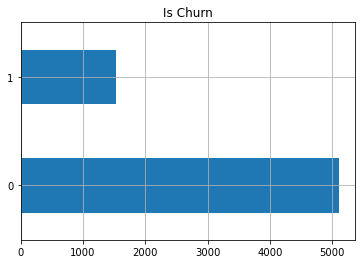

In [9]:
train_data['Is_Churn'].value_counts().plot(kind='barh',grid=True, title='Is Churn')

In [10]:
is_churn_0,is_churn_1 = train_data['Is_Churn'].value_counts()
print('Churning percentage is : ',is_churn_1/(is_churn_1+is_churn_0) )
print('Not churning percentage is : ',is_churn_0/(is_churn_1+is_churn_0) )

Churning percentage is :  0.23112781954887218
Not churning percentage is :  0.7688721804511278


- Note :- 
   - So we an imbalanced data as percentage of customers who will churn is 23% and rest 76% of customers will not churn.
   - In order to tackel this problem we have to do the upsampling of data using SMOTE or ADASYN. 

In [11]:
train_data['Income'].value_counts() # data is fairly balanced

10L - 15L        1885
5L - 10L         1847
Less than 5L     1573
More than 15L    1345
Name: Income, dtype: int64

In [12]:
train_data['Vintage'].value_counts()  # data is fairly balanced

3    1405
1    1354
2    1328
4    1296
0     956
5     311
Name: Vintage, dtype: int64

In [13]:
train_data['Credit_Category'].value_counts() # data is fairly balanced

Poor       3076
Average    2043
Good       1531
Name: Credit_Category, dtype: int64

In [14]:
train_data['Gender'].value_counts()  # data is fairly balanced

Male      3612
Female    3038
Name: Gender, dtype: int64

In [15]:
train_data['Transaction_Status'].value_counts()  # data is fairly balanced

1    3430
0    3220
Name: Transaction_Status, dtype: int64

In [16]:
train_data['Product_Holdings'].value_counts() # data is imbalanced

1     3200
2     3182
3+     268
Name: Product_Holdings, dtype: int64

In [17]:
train_data['Credit_Card'].value_counts() # data is imbalanced

1    4418
0    2232
Name: Credit_Card, dtype: int64

## Univariant Analysis

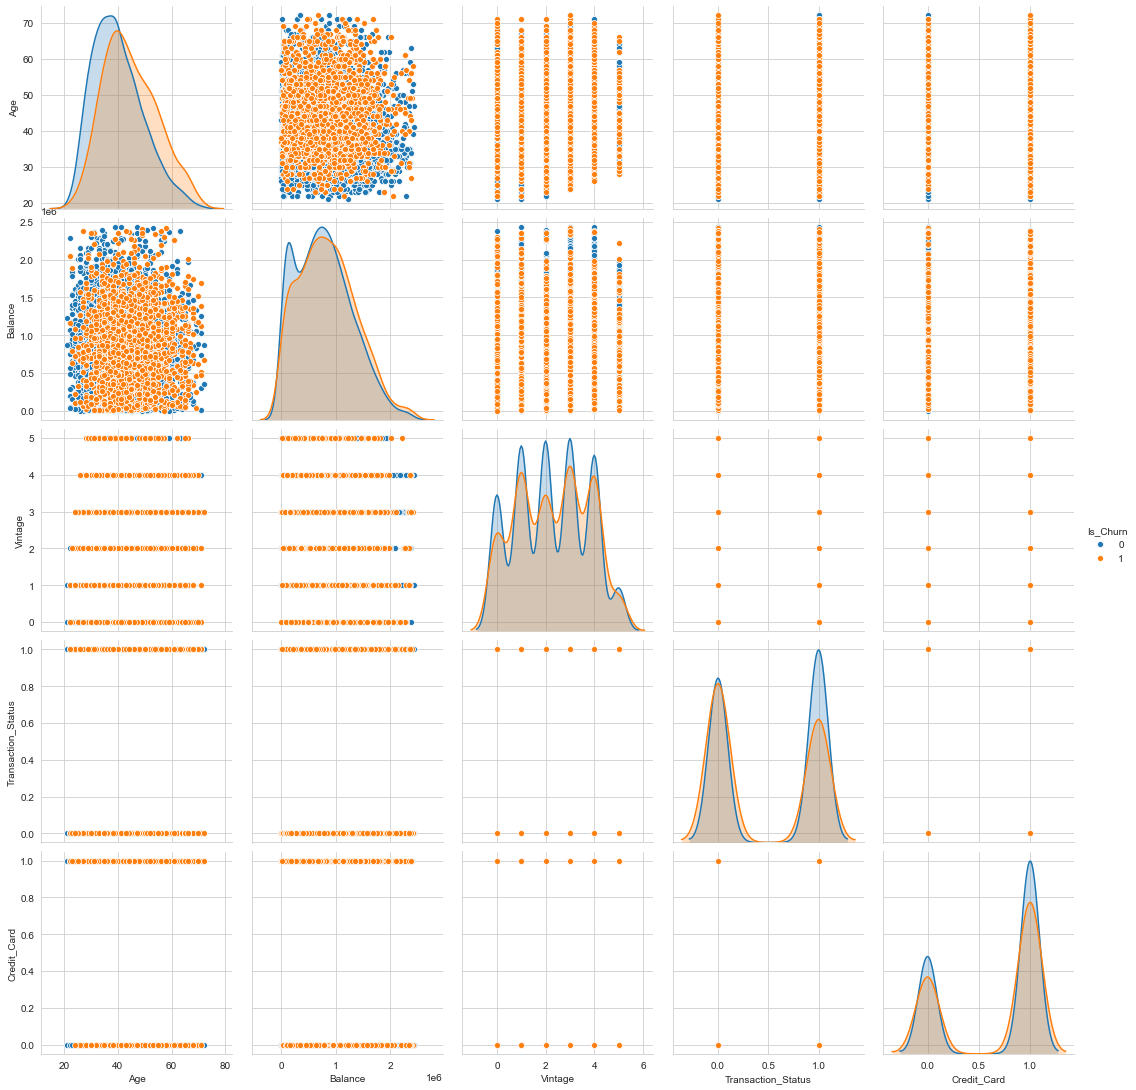

In [18]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(train_data, hue="Is_Churn", height=3);
plt.show()

- From the above graphs we can clearly see that the data is not at all linearly separable

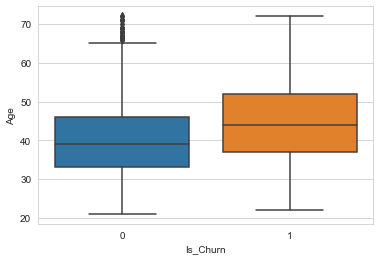

In [19]:
sns.boxplot(x='Is_Churn',y='Age', data=train_data)
plt.show()

In [20]:
# In the above bloxplot of 'Age' we can see a little bit of outliers, in order to confirm this we will use 'skew()' 
# and its value should be between -1 and 1.
train_data['Age'].skew()
# A skewness value greater than zero means that there is more weight in the right tail of the distribution.
# A positive value less than 1 and -1 can be ignored as it is not heavily skewed.
# Note :- when I tried training the model after removing the outliers the f1-score decreased so we are not removing the outliers.

0.5551708567709611

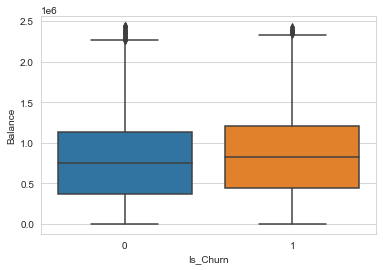

In [21]:
sns.boxplot(x='Is_Churn',y='Balance', data=train_data)
plt.show()

In [22]:
train_data['Balance'].skew() 
# Similarly we will ignore this too as if it would have been heavily skewed than we would have to replace the outliers 
# with median of the data.

0.4644595064719101

## Data Preprocessing

In [23]:
train_data['Income'] = train_data['Income'].str.replace('-','')
train_data['Income'] = train_data['Income'].str.replace('  ',' ')
train_data['Income'] = train_data['Income'].str.replace(' ','_')
#train_data['Income'] = train_data['Income'].str.lower()
train_data['Income'].value_counts()

10L_15L          1885
5L_10L           1847
Less_than_5L     1573
More_than_15L    1345
Name: Income, dtype: int64

In [24]:
test_data['Income'] = train_data['Income'].str.replace('-','')
test_data['Income'] = train_data['Income'].str.replace('  ',' ')
test_data['Income'] = train_data['Income'].str.replace(' ','_')
#train_data['Income'] = train_data['Income'].str.lower()
test_data['Income'].value_counts()

10L_15L          794
5L_10L           790
Less_than_5L     665
More_than_15L    602
Name: Income, dtype: int64

In [25]:
data = pd.get_dummies(train_data, prefix=None, prefix_sep='_', dummy_na=False, columns=['Gender','Income','Vintage','Credit_Category','Product_Holdings'], sparse=False, drop_first=False, dtype=None)
data.head(1)

,ID,Age,Balance,Transaction_Status,Credit_Card,Is_Churn,Gender_Female,Gender_Male,Income_10L_15L,Income_5L_10L,...,Vintage_2,Vintage_3,Vintage_4,Vintage_5,Credit_Category_Average,Credit_Category_Good,Credit_Category_Poor,Product_Holdings_1,Product_Holdings_2,Product_Holdings_3+
0,84e2fcc9,36,563266.44,0,0,1,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0


In [26]:
te_data = pd.get_dummies(test_data, prefix=None, prefix_sep='_', dummy_na=False, columns=['Gender','Income','Vintage','Credit_Category','Product_Holdings'], sparse=False, drop_first=False, dtype=None)
te_ID = te_data['ID']
te_X = te_data.drop('ID',axis=1)
te_X.head(1)

,Age,Balance,Transaction_Status,Credit_Card,Gender_Female,Gender_Male,Income_10L_15L,Income_5L_10L,Income_Less_than_5L,Income_More_than_15L,...,Vintage_2,Vintage_3,Vintage_4,Vintage_5,Credit_Category_Average,Credit_Category_Good,Credit_Category_Poor,Product_Holdings_1,Product_Holdings_2,Product_Holdings_3+
0,50,1008636.39,1,1,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0


## Splitting the data

In [27]:
y = data.Is_Churn
X = data.drop(['Is_Churn','ID'], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=27)

## Upsampling the data

In [28]:
from sklearn.utils import resample
#from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import ADASYN 

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
#print(X_train.shape)


#smot = SMOTE(sampling_strategy='minority')
#X_res, y_res = smot.fit_resample(X_train,y_train)      # res for resample


#ada = ADASYN()
#X_res, y_res = ada.fit_resample(X_train,y_train)




# Separate input features and target
#y = data.Is_Churn
#X = data.drop(['Is_Churn','ID'], axis=1)

# setting up testing and training sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_churn = X[X.Is_Churn==0]
churn = X[X.Is_Churn==1]

# upsample minority
churn_upsampled = resample(churn,
                          replace=True, # sample with replacement
                          n_samples=len(not_churn), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_churn, churn_upsampled])

y_res = upsampled.Is_Churn
X_res = upsampled.drop(['Is_Churn'], axis=1)

- Note:- I tried SMOTE, ADASYN and Resample for upsampling the data and trained the model for each one of them and then finally used the Resample technique which gave the highest f1-score.

## Standardising the Data

In [29]:
from sklearn.preprocessing import StandardScaler   # standardize features by removing the mean and scaling to unit variance.
scaler= StandardScaler()
#scaler = MinMaxScaler()
X_train_scaled= scaler.fit_transform(X_res)
X_test_scaled= scaler.fit_transform(X_test)
te_X_scaled = scaler.fit_transform(te_X)

## Finding the best model for the data

In [30]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as DT 
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.naive_bayes import MultinomialNB as MNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier as GBDT
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.metrics import f1_score
from sklearn.ensemble import AdaBoostClassifier as Ada
from xgboost import XGBClassifier as xgb

In [31]:
LR_params = [{"C":0.01}, {"C":0.1}, {"C":1}, {"C":10}]
DT_params = [{"criterion": "gini"}, {"criterion": "entropy"}]
#DT_params = [{"max_depth": 3, "min_samples_split": 5}]
RF_params = [{"criterion": "gini"}, {"criterion": "entropy"}]
KNN_params = [{"n_neighbors":3}, {"n_neighbors":5}]
GNB_params = [{}]
#mult_naive_bayes_params = [{"alpha":0.1,"class_prior":[0.5,0.5]}]
SVC_params = [{"C":0.0001}, {"C":0.001}, {"C":0.01}, {"C":0.1}, {"C":1}, {"C":10}]
GBDT_params = [{"max_depth":10,"n_estimators":50}]
MLP_params = [{}]
Ada_params =[{}]
xgb_params = [{'n_estimators':100}]

In [32]:
models = [
    ["Logistic Regression", LR, LR_params],
    ["Decision Tree", DT, DT_params],
    ["Random Forest", RF, RF_params],
    ["k-neighbors", KNN, KNN_params],
    ["Gaussian Naive Bayes", GNB, GNB_params],
   # ["Multinomial Naive Bayes", MultinomialNB, mult_naive_bayes_params],
    ["Support Vector Machines", SVC, SVC_params],
    ["Gradient Boosting Decision Trees", GBDT, GBDT_params],
    #["MLP Classifier", MLP, MLP_params],
    ["AdaBoost Classifier",Ada,Ada_params],
    ["xgboost",xgb,xgb_params]
]

In [33]:
F1_scores = []
for model_name, Model, params in tqdm(models):
    #print(modelname, params_list)
    for param in params:
        model = Model(**param)
        model.fit(X_train_scaled, y_res)
        y_te_pred = model.predict(X_test_scaled)
        F1_score = f1_score(y_test,y_te_pred,average='macro')        
        F1_scores.append((model_name, model, param, F1_score))

 89%|██████████████████████████████████████████████████████████████████████████▋         | 8/9 [01:02<00:05,  5.27s/it]C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:23:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [01:03<00:00,  7.09s/it]


In [34]:
F1_scores.sort(key=lambda x:x[-1], reverse=True)
for model_name, model, param, F1_score in F1_scores:
    print(model_name, param, F1_score)

Support Vector Machines {'C': 0.0001} 0.5973411557956053
Support Vector Machines {'C': 0.001} 0.5973411557956053
Support Vector Machines {'C': 0.01} 0.5950749870368155
Logistic Regression {'C': 0.01} 0.5550197873726909
Support Vector Machines {'C': 0.1} 0.5548185734513673
Logistic Regression {'C': 0.1} 0.552918308484984
Logistic Regression {'C': 1} 0.552918308484984
Logistic Regression {'C': 10} 0.552918308484984
Random Forest {'criterion': 'gini'} 0.5444359306022706
Random Forest {'criterion': 'entropy'} 0.54375973790815
Gradient Boosting Decision Trees {'max_depth': 10, 'n_estimators': 50} 0.5427118722768676
AdaBoost Classifier {} 0.5413253446762836
Gaussian Naive Bayes {} 0.5378562670461529
Support Vector Machines {'C': 1} 0.5333242442385944
xgboost {'n_estimators': 100} 0.530332548579163
Decision Tree {'criterion': 'gini'} 0.5277604665788427
Decision Tree {'criterion': 'entropy'} 0.5243151872399445
Support Vector Machines {'C': 10} 0.5174243407833318
k-neighbors {'n_neighbors': 3} 

- As we can see that the best model for our dataset is SVC, it is giving the same f1-score for C=0.0001 and C=0.001. So we will now use SVC with C=0.001 to train our model.

## Features Importance

In [35]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

In [36]:
param = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
insight = []
for i in param:
    rfe = RFE(estimator=RF(), n_features_to_select=i) # finding the best feature that gives highest f1-score
    #model = DecisionTreeClassifie()
    model = SVC(C=0.001,random_state=0)
    pipeline = Pipeline(steps=[('s',rfe),('m',model)])
    pipeline.fit(X_train_scaled, y_res)
    # make a prediction for one example

    yhat = pipeline.predict(X_test_scaled)
    F1_test = f1_score(y_test,yhat,average='macro')
    insight.append((i,F1_test))
    print(f'For features {i}  the f1-score is  {F1_test}')

For features 1  the f1-score is  0.4497786107389431
For features 2  the f1-score is  0.5386704378219278
For features 3  the f1-score is  0.553956865059982
For features 4  the f1-score is  0.5589216557251585
For features 5  the f1-score is  0.5557831505323265
For features 6  the f1-score is  0.5607304748683374
For features 7  the f1-score is  0.5627636279933581
For features 8  the f1-score is  0.5655469852523489
For features 9  the f1-score is  0.5723905106561454
For features 10  the f1-score is  0.5813813405540543
For features 11  the f1-score is  0.5860946825042569
For features 12  the f1-score is  0.5894187227915302
For features 13  the f1-score is  0.586712682408665
For features 14  the f1-score is  0.5965078959231872
For features 15  the f1-score is  0.6001575798543594
For features 16  the f1-score is  0.5911074304998485
For features 17  the f1-score is  0.5911074304998485
For features 18  the f1-score is  0.5905404229979192
For features 19  the f1-score is  0.5935863219349458
For 

In [37]:
insight.sort(key=lambda x:x[-1], reverse=True)
best_n_features = insight[0][0]
print(best_n_features)

21


In [38]:
rfe = RFE(estimator=RF(), n_features_to_select=best_n_features)
#model = DecisionTreeClassifie()
model = SVC(C=0.001,random_state=0)
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
pipeline.fit(X_train_scaled, y_res)
# make a prediction for one example

yhat = pipeline.predict(X_test_scaled)
F1_test = f1_score(y_test,yhat,average='macro')

In [39]:
print(F1_test)

0.6008871676554604


In [40]:
te_predict = pipeline.predict(te_X_scaled)

In [41]:
SVC_prediction = pd.DataFrame(te_ID, columns = ['ID'])

In [42]:
SVC_prediction['Is_Churn']=te_predict

In [43]:
SVC_prediction.head()

,ID,Is_Churn
0,55480787,0
1,9aededf2,0
2,a5034a09,0
3,b3256702,0
4,dc28adb5,0


In [44]:
SVC_prediction.to_csv('SVC_prediction.csv',index=False)